numpy pandas에서는 matplotlib 모듈에서 플로팅 제공


In [4]:
# matplotlib은 pyplot 하위 모듈
# NIAAA 현황 보고서를 통해 시간 흐름에 따라 주와 알코올 종류에 따른 소비량이 어떻게 달라지는지 플로팅

import matplotlib,matplotlib.pyplot as plt
import pandas as pd
import pickle

alco=pd.read_pickle("/content/alco.pickle")
alco

Beer  Wine  Spirits  Total
State   Year                            
Alabama 1977  0.99  0.13     0.84   1.96
        1978  0.98  0.12     0.88   1.98
        1979  0.98  0.12     0.84   1.94
        1980  0.96  0.16     0.74   1.86
        1981  1.00  0.19     0.73   1.92
...            ...   ...      ...    ...
Wyoming 2005  1.21  0.23     0.97   2.41
        2006  1.47  0.23     1.05   2.75
        2007  1.49  0.23     1.10   2.82
        2008  1.54  0.23     1.12   2.89
        2009  1.45  0.22     1.10   2.77

[1683 rows x 4 columns]

In [39]:
del alco["Total"]

In [38]:
alco.head(10)

Beer  Wine  Spirits  Total
State   Year                            
Alabama 1977  0.99  0.13     0.84   1.96
        1978  0.98  0.12     0.88   1.98
        1979  0.98  0.12     0.84   1.94
        1980  0.96  0.16     0.74   1.86
        1981  1.00  0.19     0.73   1.92
        1982  1.00  0.18     0.72   1.90
        1983  1.01  0.17     0.71   1.89
        1984  1.02  0.19     0.69   1.90
        1985  1.06  0.17     0.67   1.90
        1986  1.09  0.18     0.64   1.91

In [11]:
columns, years = alco.unstack().columns.levels  #year를 가로로 뒤집었어

In [ ]:

#파일에서 축약된 주 이름을 불러와
states=pd.read_csv("states.csv", index_col="State")
#2009년을 기준으로 알코올 소비량을 정렬
frames = [pd.merge(alco[column].unstack(), states,
                   left_index=True, right_index=True).sort_values(2009) 
          for column in columns]
frames


In [12]:
# 데이터의 총 기간은 몇 년인가?
span = max(years) - min(years) + 1
span


33

In [17]:
# 적절해보이는 스타일을 선택한다.
matplotlib.style.use("ggplot")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'aspect'
  


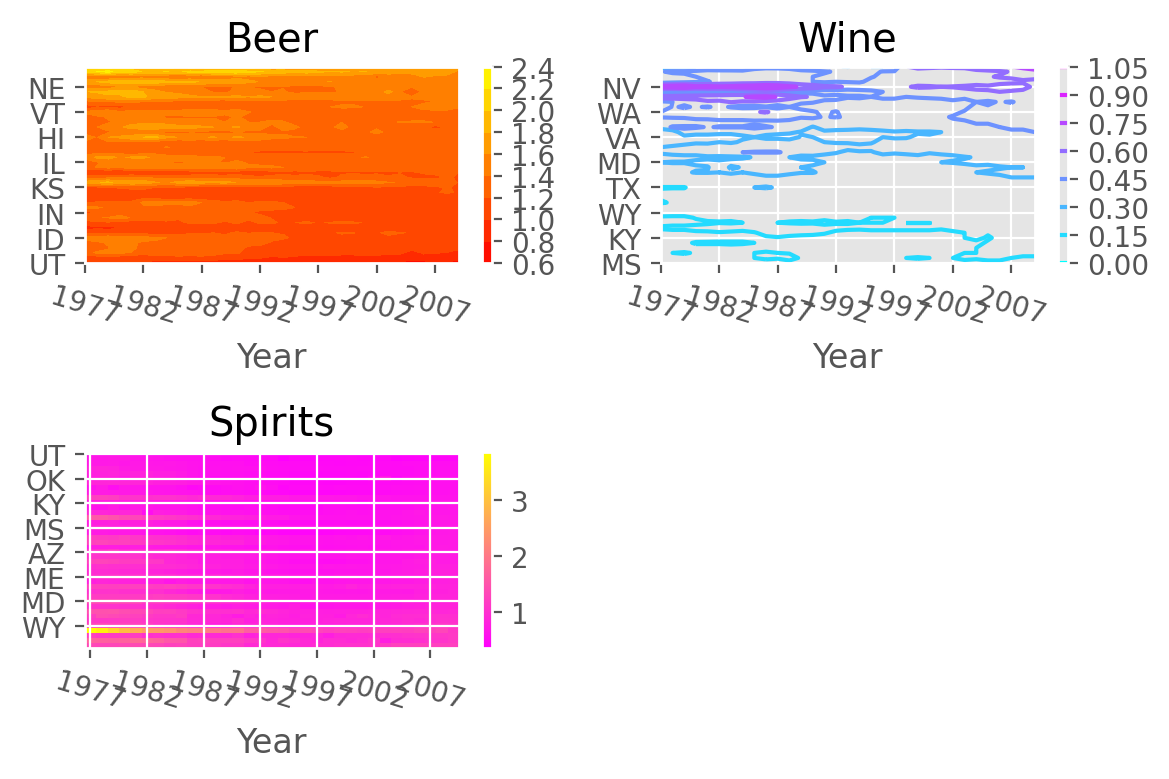

In [24]:
plt.figure(dpi = 200)

STEP = 5
# subplot에 각 데이터 프레임을 시각화한다.
for pos, (draw, style, column, frame) in enumerate(zip(
        (plt.contourf, plt.contour, plt.imshow), # (1)
        (plt.cm.autumn, plt.cm.cool, plt.cm.spring), 
        columns, frames)):
    
    # 2개 행과 2개 열을 가진 subplot을 선택한다.
    plt.subplot(2, 2, pos + 1) # (2)

    # 데이터 프레임을 시각화한다.
    draw(frame[frame.columns[:span]], cmap=style, aspect="auto") # (3)

    # 플롯을 꾸민다.
    plt.colorbar() # (4)
    plt.title(column)
    plt.xlabel("Year")
    plt.xticks(range(0, span, STEP), frame.columns[:span:STEP])
    plt.yticks(range(0, frame.shape[0], STEP), frame.Postal[::STEP])
    plt.xticks(rotation=-17)

plt.tight_layout()
#plt.savefig("pyplot-all.pdf")
plt.show()


In [30]:
#다른 플롯 타입 알아보기
import matplotlib, matplotlib.pyplot as plt
import pickle, pandas as pd

# 앞에서 NIAAA 데이터 프레임을 pickle에 저장해 두었다.
alco = pd.read_pickle("alco.pickle")
alco


Beer  Wine  Spirits  Total
State   Year                            
Alabama 1977  0.99  0.13     0.84   1.96
        1978  0.98  0.12     0.88   1.98
        1979  0.98  0.12     0.84   1.94
        1980  0.96  0.16     0.74   1.86
        1981  1.00  0.19     0.73   1.92
...            ...   ...      ...    ...
Wyoming 2005  1.21  0.23     0.97   2.41
        2006  1.47  0.23     1.05   2.75
        2007  1.49  0.23     1.10   2.82
        2008  1.54  0.23     1.12   2.89
        2009  1.45  0.22     1.10   2.77

[1683 rows x 4 columns]

In [43]:
# 플로팅에 쓸 데이터를 준비한다.
BEVERAGE = "Beer"
years = alco.index.levels[1]
states = ("New Hampshire", "Colorado", "Utah")

# 적절한 스타일을 고른다.

plt.figure(dpi = 200)
plt.xkcd()
matplotlib.style.use("ggplot")


<Figure size 1280x960 with 0 Axes>

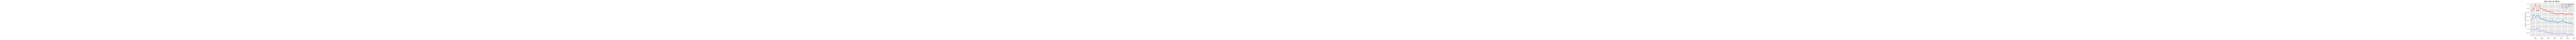

In [44]:
# 차트를 그린다.
for state in states:
    ydata = alco.loc[state][BEVERAGE]
    plt.plot(years, ydata, "-o")
    # 화살표와 메모를 추가한다.
    plt.annotate(s="Peak", xy=(ydata.argmax(), ydata.max()),
                 xytext=(ydata.argmax() + 0.5, ydata.max() + 0.1),
                 arrowprops={"facecolor": "black", "shrink": 0.2})
# 레이블과 범례를 추가한다.
plt.ylabel(BEVERAGE + " consumption")
plt.title("And now in xkcd...")
plt.legend(states)
plt.show()


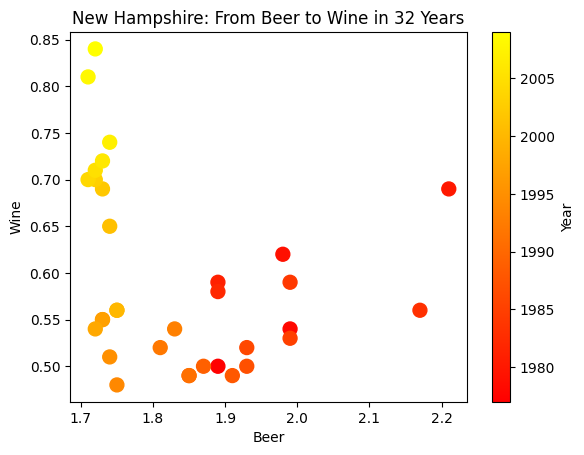

In [37]:
# 적절한 스타일을 고른다.
matplotlib.style.use("default")

# 스캐터 플롯을 그린다. 뉴햄프셔 주가 점차 맥주 소비를 줄이고, 와인을 선호하는 추세를 변하는 것으로 확인
STATE = "New Hampshire"
statedata = alco.loc[STATE].reset_index()
statedata.plot.scatter("Beer", "Wine", c="Year", s=100, cmap=plt.cm.autumn)

plt.title("%s: From Beer to Wine in 32 Years" % STATE)
plt.show()
#변화된 양상을 볼 때 스캐터를 본다

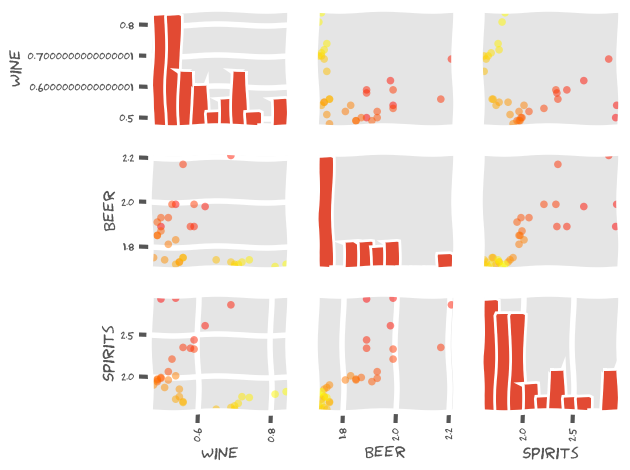

In [46]:
from pandas.plotting import scatter_matrix

# 적절한 스타일을 고른다.
matplotlib.style.use('ggplot')

# scatter matrix를 그린다.
STATE = "New Hampshire"
statedata = alco.loc[STATE].reset_index()
scatter_matrix(statedata[["Wine", "Beer", "Spirits"]],
               s=120, c=statedata["Year"], cmap=plt.cm.autumn)

plt.tight_layout()
plt.show()


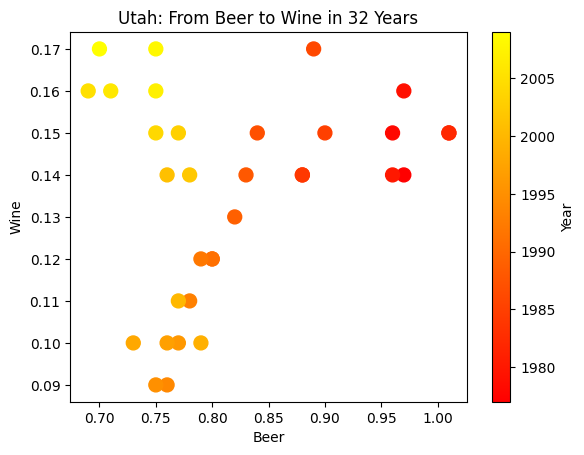

In [40]:
STATE = "Utah"
statedata = alco.loc[STATE].reset_index()
statedata.plot.scatter("Beer", "Wine", c="Year", s=100, cmap=plt.cm.autumn)

plt.title("%s: From Beer to Wine in 32 Years" % STATE)
plt.show()